In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [31]:
data=sns.load_dataset("titanic")

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def dataCleaner(data: pd.DataFrame):
    """
    Cleans a dataframe to make it ML-ready:
    - Drops missing values
    - Converts strings to lowercase
    - Label-encodes categorical columns
    - Returns cleaned df + encoders
    """
    df = data.copy()
    df=df.drop_duplicates()

    # 1. Drop missing values
    df.dropna(inplace=True)

    # 2. Convert categorical strings to lowercase
    for col in df.select_dtypes(include=['object', 'category']).columns:
        df[col] = df[col].astype(str).str.lower()
    for col in df.select_dtypes(include=['bool']).columns:
        df[col]=df[col].astype(int)

    # 3. Encode categorical columns
    encoders = {}
    for col in df.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

    return df, encoders


In [34]:
d,end=dataCleaner(data)

In [35]:
d

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,0
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
6,0,1,1,54.0,0,0,51.8625,2,0,1,1,4,2,0,1
10,1,3,0,4.0,1,1,16.7000,2,2,0,0,6,2,1,0
11,1,1,0,58.0,0,0,26.5500,2,0,2,0,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,0,47.0,1,1,52.5542,2,0,2,0,3,2,1,0
872,0,1,1,33.0,0,0,5.0000,2,0,1,1,1,2,0,1
879,1,1,0,56.0,0,1,83.1583,0,0,2,0,2,0,1,0
887,1,1,0,19.0,0,0,30.0000,2,0,2,0,1,2,1,1


In [36]:
from sklearn.model_selection import train_test_split


In [37]:
X, y = d.drop(columns=['survived']), d['survived']

x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=True,
    random_state=42
)


In [38]:
from sklearn.ensemble import RandomForestClassifier


In [53]:
model=RandomForestClassifier()

In [55]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
y_pred=model.predict(x_test)

In [57]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [43]:
from sklearn.decomposition import PCA


  

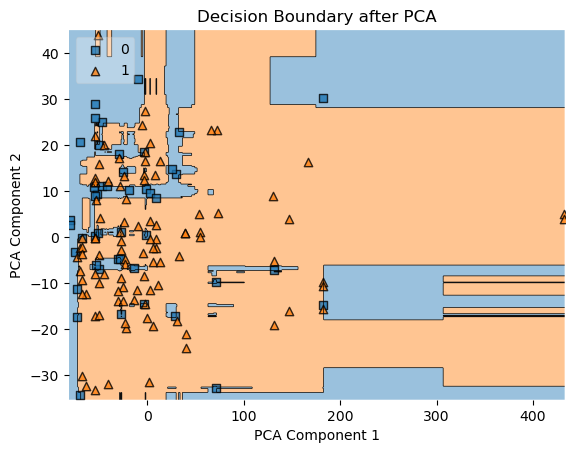

In [63]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

model.fit(x_train_pca, y_train)

plot_decision_regions(x_train_pca, y_train.values, clf=model, legend=2)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundary after PCA")
plt.show()

In [45]:
x_test.shape

(37, 14)

In [46]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [47]:
y_train.shape

(144,)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate a synthetic dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)
model = LogisticRegression()
model.fit(X, y)



LogisticRegression()

In [49]:
X.shape

(100, 2)

In [50]:
y.shape

(100,)